In [3]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re

from itertools import combinations
from operator import itemgetter

import networkx as nx
import networkx as nx
from networkx.algorithms import community

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


In [4]:
#import cleaned dataset
#%%time
df = pd.read_csv('combined_WoS')
print('rows:',len(df))

rows: 4722


In [5]:
#df.head()

In [6]:
df.columns

Index(['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP', 'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'PG', 'WC', 'SC', 'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA'], dtype='object')

In [7]:
df_author_doi= pd.DataFrame(df['AR'])
df_author_year= pd.DataFrame(df['PD'])

df_ref_doi = pd.DataFrame(df['FX'].str.split(';', 1000, expand=True))

df_p2p_doi = pd.concat([df_author_year, df_author_doi, df_ref_doi], axis=1, sort=False)
df_p2p_doi.head(1)

,PD,AR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231
0,2010.0,10.1109/TAES.2010.5595582,"AARONS J, 1982, P IEEE, V70, P360, DOI 10.1109/PROC.1982.12314","Aarons J, 1997, J GEOPHYS RES-SPACE, V102, P17219, DOI 10.1029/97JA01118","Bishop G., 1998, P ION GPS 1998 LONG","CAMERON A, 2006, GPS WORLD JUL","Cervera M. A., 1998, ACTA GEOD GEOPHYS HU, V33, P25","Conker R. S., 2003, RADIO SCI, V38","Enge P., 2006, GLOBAL POSITIONING S","FREMOUW EJ, 1978, RADIO SCI, V13, P167, DOI 10.1029/RS013i001p00167","FREMOUW EJ, 1980, J ATMOS TERR PHYS, V42, P717, DOI 10.1016/0021-9169(80)90055-0","GHERM VE, 2003, P 12 INT C ANT PROP, V1, P413","GROVES KM, 2000, P ION GPS 2000 SALT","Hegarty C, 2001, RADIO SCI, V36, P1221, DOI 10.1029/1999RS002425","Humphreys T., 2009, IEEE J SEL TOP QUANT, V3, P716","Humphreys T. E., 2004, P ION GNSS LONG BEAC, P399","HUMPHREYS TE, 2005, [No title captured]","Humphreys TE, 2010, IEEE T AERO ELEC SYS, V46, P1624, DOI 10.1109/TAES.2010.5595583","Kintner PM, 2004, RADIO SCI, V39, DOI 10.1029/2003RS002878","Klobuchar J A, 1996, GLOBAL POSITIONING S, VI, P485, DOI DOI 10.2514/5.9781600866388.0485.0515","Knight M., 1998, P ION GPS 1998 NASHV","Ledvina B. M., 2002, GEOPHYS RES LETT, V29","LINDSEY WC, 1981, P IEEE, V69, P410, DOI 10.1109/PROC.1981.11986","Luo N, 2003, IEEE T AERO ELEC SYS, V39, P936, DOI 10.1109/TAES.2003.1238747","Morrissey TN, 2004, RADIO SCI, V39, DOI 10.1029/2002RS002838","NAKAGAMI M, 1960, STAT METHODS RADIO W, P3, DOI DOI 10.1016/B978-0-08-009306-2.50005-4","RINO CL, 1981, RADIO SCI, V16, P245, DOI 10.1029/RS016i002p00245","RINO CL, 1982, RADIO SCI, V17, P855, DOI 10.1029/RS017i004p00855","RINO CL, 1979, RADIO SCI, V14, P1135, DOI 10.1029/RS014i006p01135","Simon M. K., 2000, DIGITAL COMMUNICATIO","STEPHENS SA, 1995, IEEE T AERO ELEC SYS, V31, P78, DOI 10.1109/7.366295","VANDIERENDONCK AJ, 2005, 11 INT ION EFF S AL","VITERBI AJ, 1966, PRINCIPLES COHERENT","Y, 1982, J GEOPHYS RES SPACE, V70, P324",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [8]:
#generate dataframe containing all paper references
############################################################
#iter through rows 
a=[]  
for index, row in df_p2p_doi.iterrows():
    a.append(row.T)

#check length according to input of papers
len(a)

############################################################
#transform to dataframe
def_ref_names = pd.DataFrame(a)
#def_ref_names

#fill missing values with 'na'
def_ref_names = def_ref_names.replace(r'^\s*$', np.nan, regex=True)
def_ref_names = def_ref_names.fillna('na')

#add prefix DOI for OG paper
def_ref_names['AR'] = 'DOI '+ def_ref_names['AR']

#output
def_ref_names.head(1)
############################################################

,PD,AR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231
0,2010,DOI 10.1109/TAES.2010.5595582,"AARONS J, 1982, P IEEE, V70, P360, DOI 10.1109/PROC.1982.12314","Aarons J, 1997, J GEOPHYS RES-SPACE, V102, P17219, DOI 10.1029/97JA01118","Bishop G., 1998, P ION GPS 1998 LONG","CAMERON A, 2006, GPS WORLD JUL","Cervera M. A., 1998, ACTA GEOD GEOPHYS HU, V33, P25","Conker R. S., 2003, RADIO SCI, V38","Enge P., 2006, GLOBAL POSITIONING S","FREMOUW EJ, 1978, RADIO SCI, V13, P167, DOI 10.1029/RS013i001p00167","FREMOUW EJ, 1980, J ATMOS TERR PHYS, V42, P717, DOI 10.1016/0021-9169(80)90055-0","GHERM VE, 2003, P 12 INT C ANT PROP, V1, P413","GROVES KM, 2000, P ION GPS 2000 SALT","Hegarty C, 2001, RADIO SCI, V36, P1221, DOI 10.1029/1999RS002425","Humphreys T., 2009, IEEE J SEL TOP QUANT, V3, P716","Humphreys T. E., 2004, P ION GNSS LONG BEAC, P399","HUMPHREYS TE, 2005, [No title captured]","Humphreys TE, 2010, IEEE T AERO ELEC SYS, V46, P1624, DOI 10.1109/TAES.2010.5595583","Kintner PM, 2004, RADIO SCI, V39, DOI 10.1029/2003RS002878","Klobuchar J A, 1996, GLOBAL POSITIONING S, VI, P485, DOI DOI 10.2514/5.9781600866388.0485.0515","Knight M., 1998, P ION GPS 1998 NASHV","Ledvina B. M., 2002, GEOPHYS RES LETT, V29","LINDSEY WC, 1981, P IEEE, V69, P410, DOI 10.1109/PROC.1981.11986","Luo N, 2003, IEEE T AERO ELEC SYS, V39, P936, DOI 10.1109/TAES.2003.1238747","Morrissey TN, 2004, RADIO SCI, V39, DOI 10.1029/2002RS002838","NAKAGAMI M, 1960, STAT METHODS RADIO W, P3, DOI DOI 10.1016/B978-0-08-009306-2.50005-4","RINO CL, 1981, RADIO SCI, V16, P245, DOI 10.1029/RS016i002p00245","RINO CL, 1982, RADIO SCI, V17, P855, DOI 10.1029/RS017i004p00855","RINO CL, 1979, RADIO SCI, V14, P1135, DOI 10.1029/RS014i006p01135","Simon M. K., 2000, DIGITAL COMMUNICATIO","STEPHENS SA, 1995, IEEE T AERO ELEC SYS, V31, P78, DOI 10.1109/7.366295","VANDIERENDONCK AJ, 2005, 11 INT ION EFF S AL","VITERBI AJ, 1966, PRINCIPLES COHERENT","Y, 1982, J GEOPHYS RES SPACE, V70, P324",na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na


In [9]:
#for timebin matching
def_ref_names['PD'] = def_ref_names['PD'].astype(str)

df_year = def_ref_names[['PD','AR']]
df_year = df_year[df_year['AR']!='na']
df_year = df_year.apply(lambda x: x.str.strip('DOI '))

df_year = df_year.set_index('AR')
df_year

,PD
AR,
10.1109/TAES.2010.5595582,2010.0
10.1021/ef100972f,2010.0
10.1016/j.fuel.2010.03.040,2010.0
10.1016/j.fuel.2010.01.019,2010.0
10.1016/j.ifset.2010.06.006,2010.0
...,...
10.1007/s11276-010-0253-3,2010.0
10.1016/j.desal.2010.04.010,2010.0
10.1016/j.cattod.2009.11.015,2010.0


In [10]:
#filter DOIs only from resulting string in dataframe
############################################################
a = def_ref_names.values.tolist()

for lst in a:
    for ind, item in enumerate(lst):
        lst[ind] = lst[ind].split(',')[-1]

#transform list to dataframe
def_ref_names = pd.DataFrame(a)

#output reference id dataframe
def_ref_names.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
0,2010.0,DOI 10.1109/TAES.2010.5595582,DOI 10.1109/PROC.1982.12314,DOI 10.1029/97JA01118,P ION GPS 1998 LONG,GPS WORLD JUL,P25,V38,GLOBAL POSITIONING S,DOI 10.1029/RS013i001p00167,DOI 10.1016/0021-9169(80)90055-0,P413,P ION GPS 2000 SALT,DOI 10.1029/1999RS002425,P716,P399,[No title captured],DOI 10.1109/TAES.2010.5595583,DOI 10.1029/2003RS002878,DOI DOI 10.2514/5.9781600866388.0485.0515,P ION GPS 1998 NASHV,V29,DOI 10.1109/PROC.1981.11986,DOI 10.1109/TAES.2003.1238747,DOI 10.1029/2002RS002838,DOI DOI 10.1016/B978-0-08-009306-2.50005-4,DOI 10.1029/RS016i002p00245,DOI 10.1029/RS017i004p00855,DOI 10.1029/RS014i006p01135,DIGITAL COMMUNICATIO,DOI 10.1109/7.366295,11 INT ION EFF S AL,PRINCIPLES COHERENT,P324,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na,na


In [11]:
#function to indentify if datapoint contains DOI
def DOI_finder(phrase):
    if ('DOI' in phrase):
        return phrase
    else:
        return 'false'

In [12]:
#filter dataframe for datapoints which are not DOIs
############################################################
for lst in a:
    for ind, item in enumerate(lst):
        lst[ind] = DOI_finder(lst[ind])

for ind, item in enumerate(a):
    a[ind] = [elem for elem in item if elem != 'false']
    
df_p2p_pre = pd.DataFrame(a)

In [13]:
df_p2p_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214
0,DOI 10.1109/TAES.2010.5595582,DOI 10.1109/PROC.1982.12314,DOI 10.1029/97JA01118,DOI 10.1029/RS013i001p00167,DOI 10.1016/0021-9169(80)90055-0,DOI 10.1029/1999RS002425,DOI 10.1109/TAES.2010.5595583,DOI 10.1029/2003RS002878,DOI DOI 10.2514/5.9781600866388.0485.0515,DOI 10.1109/PROC.1981.11986,DOI 10.1109/TAES.2003.1238747,DOI 10.1029/2002RS002838,DOI DOI 10.1016/B978-0-08-009306-2.50005-4,DOI 10.1029/RS016i002p00245,DOI 10.1029/RS017i004p00855,DOI 10.1029/RS014i006p01135,DOI 10.1109/7.366295,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,DOI 10.1021/ef100972f,DOI 10.1021/ef0606207,DOI 10.1021/op900257f,DOI 10.1039/a827213z,DOI 10.1071/CH08503,DOI 10.1016/j.cej.2009.09.036,DOI Peter Peregrinus,DOI 10.1021/op800091p,DOI 10.1021/ef900598m,DOI 10.1021/op900325e,DOI 10.1039/b310502d,DOI 10.1002/ceat.200301836,DOI 10.1002/cssc.200700036,DOI 10.1002/er.1005,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,DOI 10.1016/j.fuel.2010.03.040,DOI 10.1016/0016-2361(95)00122-L,DOI 10.1016/j.jaap.2004.09.002,DOI 10.1016/S0165-2370(97)00085-5,DOI 10.1016/S0261-3069(00)00052-2,DOI 10.1021/es990883y,DOI 10.1016/S0956-053X(02)00083-1,DOI 10.1016/j.wasman.2008.06.003,DOI 10.1016/S0165-2370(00)00201-1,DOI 10.1016/S0378-3820(03)00054-7,DOI 10.1016/j.ces.2006.03.054,DOI 10.1021/ie9805032,DOI 10.1016/0378-3820(95)00064-X,DOI 10.1016/j.enconman.2008.02

In [14]:
#final dataframe containing only DOIs
############################################################
df_p2p_final = df_p2p_pre.apply(lambda x: x.str.strip('DOI '))

#output reference id dataframe
print(df_p2p_final.shape)
df_p2p_final.head(1)

(4722, 215)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214
0,10.1109/TAES.2010.5595582,10.1109/PROC.1982.12314,10.1029/97JA01118,10.1029/RS013i001p00167,10.1016/0021-9169(80)90055-0,10.1029/1999RS002425,10.1109/TAES.2010.5595583,10.1029/2003RS002878,10.2514/5.9781600866388.0485.0515,10.1109/PROC.1981.11986,10.1109/TAES.2003.1238747,10.1029/2002RS002838,10.1016/B978-0-08-009306-2.50005-4,10.1029/RS016i002p00245,10.1029/RS017i004p00855,10.1029/RS014i006p01135,10.1109/7.366295,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [15]:
DOI_list = df['AR'].tolist()
DOI_list = ['no_DOI' if x is np.nan else x for x in DOI_list]

def create_paper2paper_network(df):
    df = df.replace(np.nan,np.nan)
    df = df[df.isin(DOI_list)]
    
    print(df.shape)
    
    #all combinations (all with all)
    df['combinations'] = df.apply(lambda r: list(combinations(r, 2)), axis=1)
    #print(df['combinations'])
    count_row = df.shape[0]-1
    dataframe = pd.DataFrame([])
    
    for i in range(count_row):
        res = df.combinations.iloc[i]
        res = pd.DataFrame(res)
        res = res.dropna()
        dataframe = dataframe.append(res, ignore_index=True)
        
    df_paper = dataframe
    df_paper.columns =['OG_PAPER', 'REF_PAPER'] 
    
    return df_paper

In [16]:
#number of missing DOIs
DOI_list.count('no_DOI')

1139

In [17]:
#output incl. all references to all OG papers
df_full_frame = create_paper2paper_network(df_p2p_final)
df_full_frame

(4722, 215)


,OG_PAPER,REF_PAPER
0,10.1016/j.ifset.2010.06.006,10.1016/j.ifset.2009.08.014
1,10.1016/j.desal.2010.04.063,10.1016/j.desal.2009.09.030
2,10.1016/j.jhazmat.2010.05.073,10.1016/j.jhazmat.2008.11.037
3,10.1021/op100157q,10.1021/op0501444
4,10.1088/0004-637X/718/1/543,10.1086/605730
...,...,...
3779,10.1299/jtst.6.69,10.1252/jcej.08we277
3780,10.1109/MCOM.2010.5673083,10.1007/s12243-009-0104-3
3781,10.1016/j.cattod.2010.01.037,10.1016/j.apcata.2008.07.017
3782,10.1016/j.cattod.2010.01.037,10.1016/0009-2509(77)80006-7


In [18]:
#show number of unique values for OG paper / reference paper
df_full_frame.nunique()

OG_PAPER     997
REF_PAPER    765
dtype: int64

In [19]:
#outout für gephi only
df_p2p_gephi = df_full_frame.copy()

#rename columns
df_p2p_gephi.columns=['Source','Target']

#save output
df_p2p_gephi.to_csv(r'GEPHI_P2P_t=full.csv',index=False)

In [20]:
#for time bins
df_year_match = df_full_frame.copy()
df_year_match = df_year_match.set_index('OG_PAPER')

In [21]:
df_year_match = pd.merge(df_year_match, df_year, left_index=True, right_index=True)
df_year_match = df_year_match.reset_index().rename({'index':'OG_PAPER'}, axis=1)
df_year_match = df_year_match[df_year_match['PD'] != 'na']
df_year_match['PD'] = df_year_match['PD'].astype(float)

#output
print(df_year_match.shape)
df_year_match.columns

(3760, 3)


Index(['OG_PAPER', 'REF_PAPER', 'PD'], dtype='object')

In [22]:
df_2019_2013 = df_year_match[(df_year_match['PD']>=2019)] 
df_2019_2013 = df_year_match[(df_year_match['PD']<=2013)]
print(df_2019_2013.shape)

df_2012_2006 = df_year_match[(df_year_match['PD']>=2012)] 
df_2012_2006 = df_year_match[(df_year_match['PD']<=2006)]
print(df_2012_2006.shape)

df_2005_1999 = df_year_match[(df_year_match['PD']>=2005)] 
df_2005_1999 = df_year_match[(df_year_match['PD']<=1999)]
print(df_2005_1999.shape)

(2083, 3)
(1245, 3)
(486, 3)


In [23]:
#T3
df_2005_1999.to_csv(r'NETWORK_P2P_t=2005_1999.csv', index= False)

In [24]:
#T3
df_2012_2006.to_csv(r'NETWORK_P2P_t=2012_2006.csv', index= False)

In [25]:
#T3
df_2019_2013.to_csv(r'NETWORK_P2P_t=2019_2013.csv', index= False)

----

In [26]:
#save data for complete timeframe
df_full_frame.to_csv(r'NETWORK_P2P_t.full.csv', index= False)

----

In [4]:
#re-import csv for quicker access to networkX
df_full_frame = pd.read_csv('NETWORK_P2P_t.full.csv')
df_2005_1999 = pd.read_csv('NETWORK_P2P_t=2005_1999.csv')
df_2012_2006 = pd.read_csv('NETWORK_P2P_t=2012_2006.csv')
df_2019_2013 = pd.read_csv('NETWORK_P2P_t=2019_2013.csv')

In [5]:
# Create Networks (source = name linke column; target = name rechte columns; vllt anpasssen)
G1 = nx.from_pandas_edgelist(df_2005_1999, source="OG_PAPER", target="REF_PAPER")
G2 = nx.from_pandas_edgelist(df_2012_2006, source="OG_PAPER", target="REF_PAPER")
G3 = nx.from_pandas_edgelist(df_2019_2013, source="OG_PAPER", target="REF_PAPER")
G_full = nx.from_pandas_edgelist(df_full_frame, source="OG_PAPER", target="REF_PAPER")


# function 
def network_info(G,min_time,max_time): 
    network_info = pd.DataFrame([],[str(min_time)+"-"+str(max_time)], columns = ["Number of Nodes","Number of Edges"])
    
    network_info["Number of Nodes"] = G.number_of_nodes()
    network_info["Number of Edges"] = G.number_of_edges()
    network_info["Network Density"] = nx.density(G)
    
    G_deg = nx.degree_histogram(G)
    G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
    network_info["Average Degree"] = (sum(G_deg_sum) / G.number_of_nodes())
    
    return network_info

# application of function
ni_1 = network_info(G1,1999,2005)
ni_2 = network_info(G2,2006,2012)
ni_3 = network_info(G3,2013,2019)

info_networks = pd.concat([ni_1,ni_2,ni_3], axis=0)
info_networks

,Number of Nodes,Number of Edges,Network Density,Average Degree
1999-2005,240,290,0.010112,2.416667
2006-2012,426,637,0.007037,2.990610
2013-2019,802,1278,0.003979,3.187032


In [6]:
def degree_func(sorted_degree, topcount):
    liste_d = []
    for d in sorted_degree[:topcount]:
        liste_d.append(d)
    df_degree = pd.DataFrame(liste_d,columns = ["Top nodes by degree:", "Degree"])
    return df_degree

def betweenness_func(sorted_betweenness, topcount):
    liste_b = []
    for d in sorted_betweenness[:topcount]:
        liste_b.append(d)
    df_between = pd.DataFrame(liste_b,columns = ["Top nodes by betweenness:", "Betweenness"])
    return df_between
    
def eigenvector_func(sorted_eigenvector, topcount):
    liste_e = []
    for d in sorted_eigenvector[:topcount]:
        liste_e.append(d)
    df_eigenvector = pd.DataFrame(liste_e,columns = ["Top nodes eigenvector:", "eigenvector"])
    return df_eigenvector

In [7]:
degree_dict = dict(G_full.degree(G_full.nodes()))
nx.set_node_attributes(G_full, degree_dict, 'degree')
    
#sort by degree
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
df_g_full = pd.DataFrame(sorted_degree, columns=['name', 'degree'])

print(len(df_g_full['degree']))
print(df_g_full['degree'].mean())
print(len(df_g_full.degree[df_g_full['degree']==1]))

nx.density(G_full), nx.density(G1), nx.density(G2), nx.density(G3)

1302
3.978494623655914
555


(0.0030580281503888654,
 0.010111576011157601,
 0.00703673018503176,
 0.003978817002437726)

In [29]:
def network_insights(G, topcount):
    
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
    
    #sort by degree
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
    eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

    # Assign each to an attribute in your network
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
    
    #sort by betweenness / eigenvector
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
    sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

    network_insights = pd.DataFrame([], columns = ["Top nodes by degree:","Top nodes by betweenness centrality:","Top nodes by eigenvector:"])
    
    df_degree = degree_func(sorted_degree, topcount)
    df_between = betweenness_func(sorted_betweenness, topcount)
    df_eigenvector = eigenvector_func(sorted_eigenvector, topcount)
    
    network_insights = pd.concat([df_degree, df_between, df_eigenvector], axis=1, sort=False)
    
    return network_insights

In [30]:
#network insights
network_insights(G2, 5)

,Top nodes by degree:,Degree,Top nodes by betweenness:,Betweenness,Top nodes eigenvector:,eigenvector
0,10.13182/NSE93-A24041,25,10.1145/956993.956995,0.005655,10.1016/S0951-8320(00)00031-4,0.247679
1,10.1016/0951-8320(95)00089-5,25,10.1016/j.future.2003.10.002,0.004273,10.13182/NSE93-A24041,0.247073
2,10.1016/S0951-8320(00)00031-4,23,10.1021/ie050569e,0.004256,10.1016/0951-8320(95)00089-5,0.247073
3,10.1287/opre.39.5.701,23,10.1016/j.bjp.2014.01.002,0.003663,10.1016/S0951-8320(00)00040-5,0.241237
4,10.1016/S0951-8320(00)00040-5,22,10.1287/opre.39.5.701,0.002808,10.1016/S0951-8320(00)00032-6,0.237331


In [36]:
#degree distribution for all years combined
from collections import Counter
from matplotlib import pyplot as plt

def plotDegreeDistribution(G1): 
    c = Counter(list(dict(nx.degree(G1)).values()))
    x, y =  zip(*sorted(c.items()))
    #y = [float(i) / sum(y) for i in y]
    plt.plot(x, y, 'bo', color = 'steelblue')
    plt.xscale('log')

    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('Degree', fontsize = 10)
    plt.ylabel('Frequency of Degree', fontsize = 10)
    plt.title('$Degree\,Distribution$', fontsize = 15)
    plt.show()

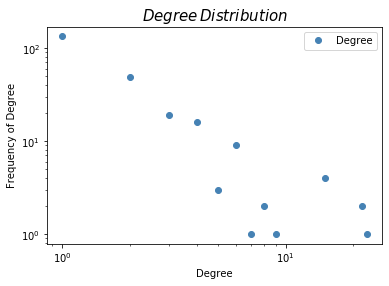

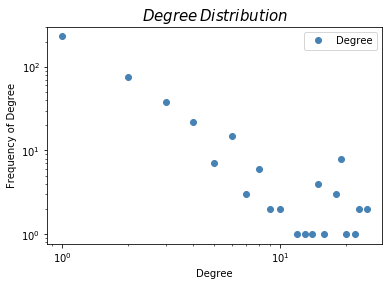

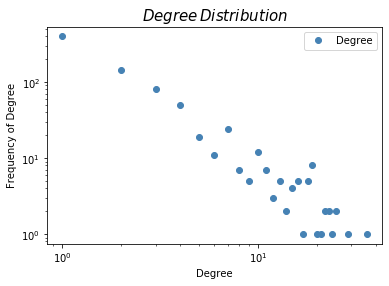

(None, None, None)

In [43]:
#network degree distribution
plotDegreeDistribution(G1), plotDegreeDistribution(G2), plotDegreeDistribution(G3)